# Dark Matter: Profiles and $J$-factors

Reproducing plots from Cirelli *et al* Cookbook on Dark Matter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dm.profiles import MassProfileNFW, MassProfileEinasto, MassProfileIsothermal, MassProfileBurkert, MassProfileMoore

In [2]:
plt.style.use('astroph')

### Profiles

* NFW:
$$\rho_{\mathrm{NFW}}(r)  = \dfrac{\rho_s}{\dfrac{r}{r_s} \left(1+\dfrac{r}{r_s} \right)^2} $$
* Einasto:
$$\rho_{\mathrm{Ein}}(r) = \rho_s \exp\left\{-\dfrac{2}{\alpha}\left[ \left(\dfrac{r}{r_s} \right)^{\alpha}-1\right] \right\} $$
* Isothermal:
$$\rho_{\mathrm{Iso}}(r) = \dfrac{\rho_s}{1+(r/r_s)^2} $$
* Burkert:
$$\rho_{\mathrm{Bur}}(r) = \frac{\rho_s}{(1+r/r_s)(1+(r/r_s)^2)}$$
* Moore:
$$\rho_{\mathrm{Moo}}(r) = \rho_s \left(\dfrac{r_s}{r}\right)^{1.16} \left( 1 + \dfrac{r}{r_s}\right)^{-1.84}$$

In [3]:
nfw = MassProfileNFW(24.42, 0.184)

In [4]:
einasto = MassProfileEinasto(28.44, 0.033, 0.17)

In [5]:
einastoB = MassProfileEinasto(35.24, 0.021, 0.11)

In [6]:
isothermal = MassProfileIsothermal(4.38, 1.387)

In [7]:
burkert = MassProfileBurkert(12.67, 0.712)

In [8]:
moore = MassProfileMoore(30.28, 0.105)

In [9]:
r_gal = np.linspace(1e-3, 10**2, 10**3)

In [10]:
def angle_str(angle):
    if angle >= 1.0:
        return "%d°"%angle
    elif angle < 1.0 and angle > 1/60:
        minutes = np.floor(angle*60)
        return "%d'"%minutes
    else:
        seconds = angle*3600
        return "%d\""%(seconds)

In [11]:
angles = np.array([10/3600, 30/3600, 1/60, 5/60, 10/60, 30/60, 1, 2, 5, 10, 20, 45])

In [12]:
r_angle = 8.33*np.sin(angles*np.pi/180.0)

In [13]:
angles_str = [angle_str(angle) for angle in angles]

In [14]:
import os

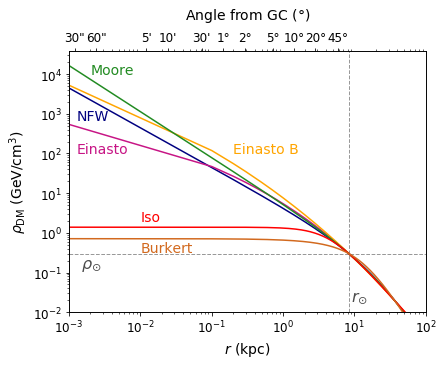

In [15]:
fig, ax = plt.subplots()
ax.plot(r_gal, nfw.density(r_gal), '-', color='navy')
ax.plot(r_gal, einasto.density(r_gal), '-', color='mediumvioletred')
ax.plot(r_gal, einastoB.density(r_gal), '-', color='orange')
ax.plot(r_gal, moore.density(r_gal), '-', color='forestgreen')
ax.plot(r_gal, isothermal.density(r_gal), '-', color='red')
ax.plot(r_gal, burkert.density(r_gal), '-', color='chocolate')

plt.text(x=0.2, y=1e2, s='Einasto B', color='orange', fontsize=14)
plt.text(x=1.3e-3, y=0.7e3, s='NFW', color='navy', fontsize=14)
plt.text(x=1.3e-3, y=0.1e3, s='Einasto', color='mediumvioletred', fontsize=14)
plt.text(x=2e-3, y=1e4, s='Moore', color='forestgreen', fontsize=14)
plt.text(x=1e-2, y=2, s='Iso', color='red', fontsize=14)
plt.text(x=1e-2, y=0.32, s='Burkert', color='chocolate', fontsize=14, zorder=1)

plt.axvline(x=8.33, linestyle='dashed', color='k', alpha=0.4, lw=1, zorder=-1)
plt.axhline(y=0.3, linestyle='dashed', color='k', alpha=0.4, lw=1, zorder=-1)

plt.text(x=9, y=2e-2, s=r'$r_{\odot}$', fontsize=16, alpha=0.7)
plt.text(x=1.5e-3, y=1.3e-1, s=r'$\rho_{\odot}$', fontsize=16, alpha=0.7)

ax.set_xlabel(r"$r$ (kpc)")
ax.set_ylabel(r"$\rho_{\mathrm{DM}}$ (GeV/cm$^{3}$)")
ax.set_xlim(1e-3, 100)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2)
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xticks(r_angle)
ax2.set_xticklabels(angles_str, fontsize=12)
ax2.set_xlim(ax.get_xlim())
ax2.set_xlabel(r"Angle from GC ($\degree$)", labelpad=12)
plt.show()

## $J$-factors 


Dark matter $J$-factors describe the astrophysical component of the observed differential photon flux, in the sense that it integrates the particle physics processes occurring along the line of sight ($\mathrm{los}$) of the observer. 


In [16]:
thetas = np.logspace(-4.5, 0, 10**3)*np.pi

In [17]:
def j_factors(angles, profile, category='annihilation'):
    if category == 'annihilation':
        res = np.array([profile.j_factor(theta, factor_type='annihilation', epsabs=0.0, epsrel=1e-3)[0] for theta in angles])
    elif category == 'decay':
        res = np.array([profile.j_factor(theta, factor_type='decay', epsabs=0.0, epsrel=1e-3)[0] for theta in angles])
    return res

In [18]:
nfw_annih = j_factors(thetas, nfw)
einasto_annih = j_factors(thetas, einasto)
einastoB_annih = j_factors(thetas, einastoB)
isothermal_annih = j_factors(thetas, isothermal)
burkert_annih = j_factors(thetas, burkert)
moore_annih = j_factors(thetas, moore)

In [19]:
nfw_decay = j_factors(thetas, nfw, category='decay')
einasto_decay = j_factors(thetas, einasto, category='decay')
einastoB_decay = j_factors(thetas, einastoB, category='decay')
isothermal_decay = j_factors(thetas, isothermal, category='decay')
burkert_decay = j_factors(thetas, burkert, category='decay')
moore_decay = j_factors(thetas, moore, category='decay')

In [20]:
thetas_deg = thetas*180.0/np.pi

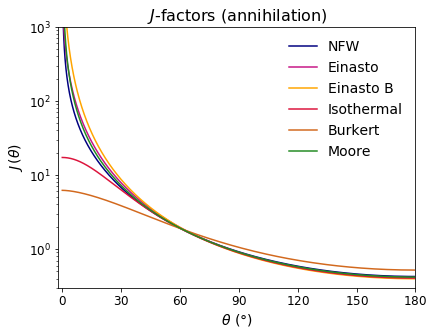

In [21]:
fig, ax = plt.subplots()
ax.plot(thetas_deg, nfw_annih, color='navy', label='NFW')
ax.plot(thetas_deg, einasto_annih, color='mediumvioletred', label="Einasto")
ax.plot(thetas_deg, einastoB_annih, color='orange', label="Einasto B")
ax.plot(thetas_deg, isothermal_annih, color='crimson', label="Isothermal")
ax.plot(thetas_deg, burkert_annih, color='chocolate', label="Burkert")
ax.plot(thetas_deg, moore_annih, color='forestgreen', label="Moore")

ax.set_yscale('log')
ax.set_ylim(0.3, 1e3)
ax.set_xlim(-2, 180)
ax.set_xticks(np.arange(0, 181, 30))
ax.set_xlabel(r"$\theta$ ($\degree$)")
ax.set_ylabel(r"$J \, (\theta)$")

plt.title(r'$J$-factors (annihilation)')
plt.legend(frameon=False, loc='upper right')
plt.ticklabel_format(axis='x', style='plain')

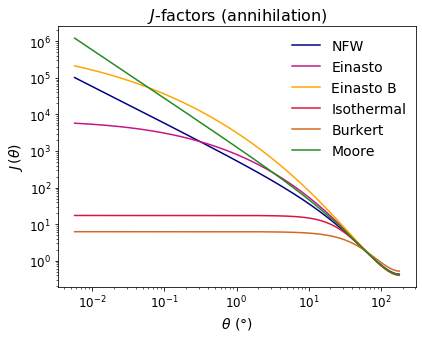

In [22]:
fig, ax = plt.subplots()
ax.plot(thetas_deg, nfw_annih, color='navy', label='NFW')
ax.plot(thetas_deg, einasto_annih, color='mediumvioletred', label="Einasto")
ax.plot(thetas_deg, einastoB_annih, color='orange', label="Einasto B")
ax.plot(thetas_deg, isothermal_annih, color='crimson', label="Isothermal")
ax.plot(thetas_deg, burkert_annih, color='chocolate', label="Burkert")
ax.plot(thetas_deg, moore_annih, color='forestgreen', label="Moore")

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\theta$ ($\degree$)")
ax.set_ylabel(r"$J \, (\theta)$")
#ax.set_xlim(0.55e-2, 180)

plt.title(r'$J$-factors (annihilation)')
plt.legend(frameon=False,  bbox_to_anchor=(1.01, 1.0))
plt.show()

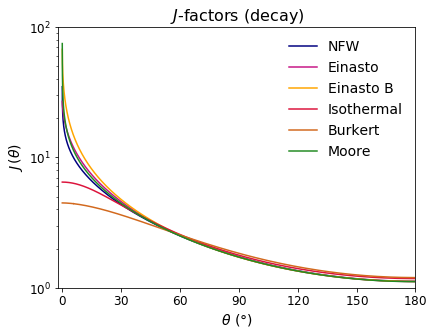

In [23]:
fig, ax = plt.subplots()
ax.plot(thetas_deg, nfw_decay, color='navy', label='NFW')
ax.plot(thetas_deg, einasto_decay, color='mediumvioletred', label='Einasto')
ax.plot(thetas_deg, einastoB_decay, color='orange', label='Einasto B')
ax.plot(thetas_deg, isothermal_decay, color='crimson', label='Isothermal')
ax.plot(thetas_deg, burkert_decay, color='chocolate', label='Burkert')
ax.plot(thetas_deg, moore_decay, color='forestgreen', label='Moore')
ax.set_yscale('log')
ax.set_ylim(1, 1e2)
ax.set_xlim(-2, 180)
ax.set_xticks(np.arange(0, 181, 30))
ax.set_xlabel(r"$\theta$ ($\degree$)")
ax.set_ylabel(r"$J \, (\theta)$")

plt.title(r'$J$-factors (decay)')
plt.legend(frameon=False, loc='upper right')
plt.ticklabel_format(axis='x', style='plain')

plt.show()

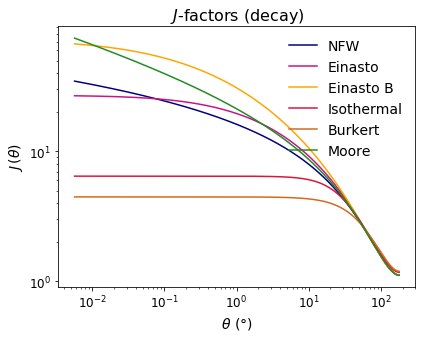

In [24]:
fig, ax = plt.subplots()
ax.plot(thetas_deg, nfw_decay, color='navy', label='NFW')
ax.plot(thetas_deg, einasto_decay, color='mediumvioletred', label='Einasto')
ax.plot(thetas_deg, einastoB_decay, color='orange', label='Einasto B')
ax.plot(thetas_deg, isothermal_decay, color='crimson', label='Isothermal')
ax.plot(thetas_deg, burkert_decay, color='chocolate', label='Burkert')
ax.plot(thetas_deg, moore_decay, color='forestgreen', label='Moore')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\theta$ ($\degree$)")
ax.set_ylabel(r"$J \, (\theta)$")
#ax.set_xlim(0.55e-2, 180)

plt.title(r'$J$-factors (decay)')
plt.legend(frameon=False, loc='upper right')
plt.show()